In [ ]:
import scrapy

class AmazonReviewsSpider(scrapy.Spider):

    # Spider name
    name = 'amazon_reviews'

    # Domain names to scrape
    allowed_domains = ['amazon.in']

    # Base URL for the product reviews
    myBaseUrl = "https://www.amazon.in/product-reviews/9387779262/ref=cm_cr_getr_d_paging_btm_prev_1?ie=UTF8&pageNumber="
    start_urls=[]

    # Creating list of urls to be scraped by appending page number a the end of base url
    for i in range(1,121):
        start_urls.append(myBaseUrl+str(i))

    # Defining a Scrapy parser
    def parse(self, response):
            data = response.css('#cm_cr-review_list')

            # Collecting product star ratings
            star_rating = data.css('.review-rating')

            # Collecting user reviews
            comments = data.css('.review-text')
            count = 0

            # Combining the results
            for review in star_rating:
                yield{'stars':
                      ''.join(review.xpath('.//text()').extract()),
                      'comment':
                          ''.join(comments[count].xpath(".//text()").extract())
                     }
                count=count+1

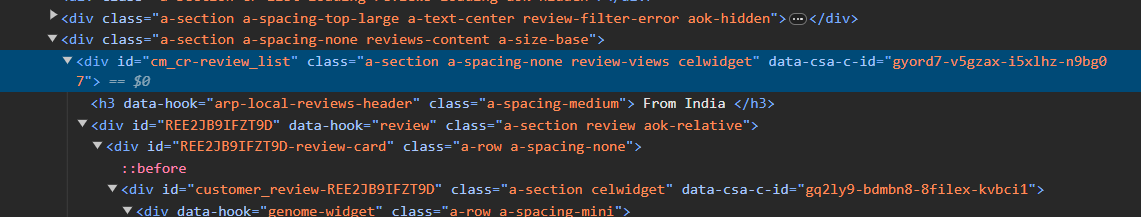

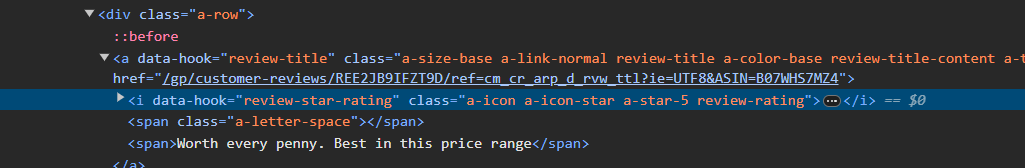

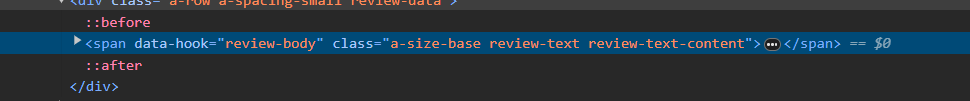